In [13]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('df_feature_engineered.csv')

In [15]:
df

,km,log_fiyat,model_1.6 TDi BlueMotion Business,model_1.6 TDi BlueMotion Comfortline,model_1.6 TDi BlueMotion Elegance,model_1.6 TDi BlueMotion Exclusive,model_1.6 TDi BlueMotion Highline,model_1.6 TDi BlueMotion Impression,model_1.6 TDi BlueMotion R Line,model_1.6 TDi BlueMotion Trendline,...,yıl_2012.0,yıl_2013.0,yıl_2014.0,yıl_2015.0,yıl_2016.0,yıl_2017.0,yıl_2018.0,yıl_2019.0,yıl_2020.0,otomatik_vites
0,56500,14.169682,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,True
1,160000,14.220309,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
2,305000,13.810498,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,270000,13.972942,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,190000,14.037854,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,65000,12.977338,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1914,165000,12.977338,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
1915,45000,12.977338,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1916,30000,12.977338,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True


In [16]:
X = df.drop(columns=['log_fiyat']).iloc[:-9]

In [17]:
X.isnull().any()

km                                      False
model_1.6 TDi BlueMotion Business       False
model_1.6 TDi BlueMotion Comfortline    False
model_1.6 TDi BlueMotion Elegance       False
model_1.6 TDi BlueMotion Exclusive      False
model_1.6 TDi BlueMotion Highline       False
model_1.6 TDi BlueMotion Impression     False
model_1.6 TDi BlueMotion R Line         False
model_1.6 TDi BlueMotion Trendline      False
kasa_Station wagon                      False
renk_Diğer                              False
renk_Füme                               False
renk_Gri                                False
renk_Kahverengi                         False
renk_Lacivert                           False
renk_Mavi                               False
renk_Siyah                              False
kimden_Sahibinden                       False
agirlikli_hasar_skoru                   False
arac_yasi                               False
b7_kasa                                 False
yıl_2012.0                        

In [18]:
y= df['log_fiyat'].iloc[:-9]

In [19]:
son_9 = df.tail(9).drop(columns=['log_fiyat'])    

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

# Sonuçları değerlendir
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression: Test MSE = {mse_lr:.4f}, Test R2 = {r2_lr:.4f}")

Linear Regression: Test MSE = 0.0069, Test R2 = 0.9035


In [22]:
örnekler_log_pred = lr.predict(son_9)
real_price_pred = np.expm1(örnekler_log_pred)
real_price_pred

array([1943416.09464906, 1080962.61393767, 1669018.23333886,
       1267287.67213604, 1625310.10695831,  995536.12460429,
       1829203.17437933, 2403706.94318732, 1863826.90362748])

In [ ]:
arabamcomtahminleri = [1591500,1256000,1407500,1021500,1317500,995000,1648000,2444000,1791000]
benim_modelin_predi = [1943416,1080962,1669018,1267287,1625310,995536,1829203,2403706,1863826]

In [24]:
r2_ornekilanlar = r2_score(np.log1p(arabamcomtahminleri), örnekler_log_pred)
r2_ornekilanlar

0.6943178466536096

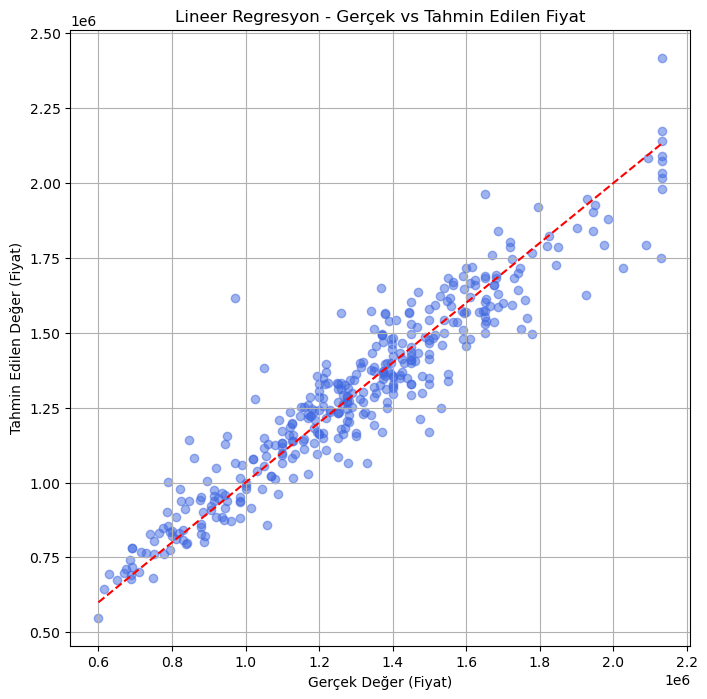

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(np.exp(y_test), np.exp(y_pred_lr), alpha=0.5, color='royalblue')
plt.plot([np.exp(y_test).min(), np.exp(y_test).max()], [np.exp(y_test).min(), np.exp(y_test).max()], 'r--')
plt.xlabel("Gerçek Değer (Fiyat)")
plt.ylabel("Tahmin Edilen Değer (Fiyat)")
plt.title("Lineer Regresyon - Gerçek vs Tahmin Edilen Fiyat")
plt.grid(True)
plt.show()

LİNEER REGRESYON MODELİMİZİN BAŞARI ORANI ~%90

MODELİ SADELEŞTİRDİĞİM İÇİN AŞAĞIDAKİ ENSEMBLE İŞLEMİNİ YAPMADIM.
BİRDEN FAZLA OPTİMİZE EDİLMİŞ MODELİN ORTAK KARARI İLE DE BİR TAHMİN YAPABİLİRDİM AMA BU GEREKSİZ UZUN SÜRERDİ
VE PERFORMANSI NEREDEYSE AYNIYDI.

In [26]:
"""
print("\n--- XGBoost Regressor Optimizasyonu ---")
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'colsample_bytree': [0.8, 1.0] # Her ağaçta kullanılacak sütun oranı
}

grid_search_xgb = GridSearchCV(
    estimator=XGBRegressor(random_state=42, eval_metric='rmse'), # eval_metric regresyon için rmse olmalı
    param_grid=param_grid_xgb,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_

print(f"En iyi XGBoost parametreleri: {grid_search_xgb.best_params_}")
print(f"En iyi XGBoost R2 skoru (çapraz doğrulama): {grid_search_xgb.best_score_:.4f}")

y_pred_xgb_tuned = best_xgb_model.predict(X_test)
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)
print(f"XGBoost (Ayarlanmış): Test MSE = {mse_xgb_tuned:.4f}, Test R2 = {r2_xgb_tuned:.4f}")"""

'\nprint("\n--- XGBoost Regressor Optimizasyonu ---")\nparam_grid_xgb = {\n    \'n_estimators\': [100, 200],\n    \'learning_rate\': [0.05, 0.1],\n    \'max_depth\': [3, 5],\n    \'colsample_bytree\': [0.8, 1.0] # Her ağaçta kullanılacak sütun oranı\n}\n\ngrid_search_xgb = GridSearchCV(\n    estimator=XGBRegressor(random_state=42, eval_metric=\'rmse\'), # eval_metric regresyon için rmse olmalı\n    param_grid=param_grid_xgb,\n    cv=5,\n    scoring=\'r2\',\n    n_jobs=-1,\n    verbose=1\n)\n\ngrid_search_xgb.fit(X_train, y_train)\nbest_xgb_model = grid_search_xgb.best_estimator_\n\nprint(f"En iyi XGBoost parametreleri: {grid_search_xgb.best_params_}")\nprint(f"En iyi XGBoost R2 skoru (çapraz doğrulama): {grid_search_xgb.best_score_:.4f}")\n\ny_pred_xgb_tuned = best_xgb_model.predict(X_test)\nmse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)\nr2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)\nprint(f"XGBoost (Ayarlanmış): Test MSE = {mse_xgb_tuned:.4f}, Test R2 = {r2_xgb_tune

In [27]:
"""# Random Forest için hiperparametre aralığı
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Kullanılacak karar ağacı sayısı
    'max_depth': [10, 20, None],      # Her bir ağacın maksimum derinliği (None = sınırsız)
    'min_samples_split': [2, 5],      # Bir düğümü bölmek için gereken minimum örnek sayısı
    'min_samples_leaf': [1, 2]        # Yaprak düğümde bulunması gereken minimum örnek sayısı
}
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Modeli eğit
grid_search_rf.fit(X_train, y_train)

print("En iyi parametreler:", grid_search_rf.best_params_)
print("En iyi R2 (CV):", grid_search_rf.best_score_)

# Test seti üzerinde değerlendirme
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Test MSE: {mse_rf:.4f}, Test R2: {r2_rf:.4f}")"""

'# Random Forest için hiperparametre aralığı\nparam_grid_rf = {\n    \'n_estimators\': [100, 200, 300],  # Kullanılacak karar ağacı sayısı\n    \'max_depth\': [10, 20, None],      # Her bir ağacın maksimum derinliği (None = sınırsız)\n    \'min_samples_split\': [2, 5],      # Bir düğümü bölmek için gereken minimum örnek sayısı\n    \'min_samples_leaf\': [1, 2]        # Yaprak düğümde bulunması gereken minimum örnek sayısı\n}\ngrid_search_rf = GridSearchCV(\n    estimator=RandomForestRegressor(random_state=42),\n    param_grid=param_grid_rf,\n    cv=5,\n    scoring=\'r2\',\n    n_jobs=-1,\n    verbose=1\n)\n\n# Modeli eğit\ngrid_search_rf.fit(X_train, y_train)\n\nprint("En iyi parametreler:", grid_search_rf.best_params_)\nprint("En iyi R2 (CV):", grid_search_rf.best_score_)\n\n# Test seti üzerinde değerlendirme\nbest_rf = grid_search_rf.best_estimator_\ny_pred_rf = best_rf.predict(X_test)\nmse_rf = mean_squared_error(y_test, y_pred_rf)\nr2_rf = r2_score(y_test, y_pred_rf)\nprint(f"Test 

In [28]:
"""

importances = best_rf.feature_importances_
features_rf = pd.Series(importances, index=X_train.columns)
features_rf.sort_values(ascending=False).head(15).plot(kind="barh")
plt.title("Random Forest - En Önemli 15 Özellik")
plt.xlabel("Önem Skoru")
plt.show()"""

'\n\nimportances = best_rf.feature_importances_\nfeatures_rf = pd.Series(importances, index=X_train.columns)\nfeatures_rf.sort_values(ascending=False).head(15).plot(kind="barh")\nplt.title("Random Forest - En Önemli 15 Özellik")\nplt.xlabel("Önem Skoru")\nplt.show()'

In [29]:
"""
# Gradient Boosting için hiperparametre aralığı
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1], # Her bir ağacın katkı oranı
    'max_depth': [3, 5, 7],             # Ağacın maksimum derinliği
    'subsample': [0.8, 1.0]             # Her bir ağaç için kullanılacak örneklerin oranı
}

# GridSearchCV kurulumu
grid_search_gb = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gb,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Eğitimi başlat
grid_search_gb.fit(X_train, y_train)

print(f"\nEn iyi Gradient Boosting parametreleri: {grid_search_gb.best_params_}")
print(f"En iyi Gradient Boosting R2 skoru (çapraz doğrulama): {grid_search_gb.best_score_:.4f}")

# En iyi model ile test seti üzerinde değerlendirme
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb_tuned = best_gb_model.predict(X_test)
mse_gb_tuned = mean_squared_error(y_test, y_pred_gb_tuned)
r2_gb_tuned = r2_score(y_test, y_pred_gb_tuned)
print(f"Gradient Boosting (Ayarlanmış): Test MSE = {mse_gb_tuned:.4f}, Test R2 = {r2_gb_tuned:.4f}")"""

'\n# Gradient Boosting için hiperparametre aralığı\nparam_grid_gb = {\n    \'n_estimators\': [100, 200, 300],\n    \'learning_rate\': [0.01, 0.05, 0.1], # Her bir ağacın katkı oranı\n    \'max_depth\': [3, 5, 7],             # Ağacın maksimum derinliği\n    \'subsample\': [0.8, 1.0]             # Her bir ağaç için kullanılacak örneklerin oranı\n}\n\n# GridSearchCV kurulumu\ngrid_search_gb = GridSearchCV(\n    estimator=GradientBoostingRegressor(random_state=42),\n    param_grid=param_grid_gb,\n    cv=5,\n    scoring=\'r2\',\n    n_jobs=-1,\n    verbose=1\n)\n\n# Eğitimi başlat\ngrid_search_gb.fit(X_train, y_train)\n\nprint(f"\nEn iyi Gradient Boosting parametreleri: {grid_search_gb.best_params_}")\nprint(f"En iyi Gradient Boosting R2 skoru (çapraz doğrulama): {grid_search_gb.best_score_:.4f}")\n\n# En iyi model ile test seti üzerinde değerlendirme\nbest_gb_model = grid_search_gb.best_estimator_\ny_pred_gb_tuned = best_gb_model.predict(X_test)\nmse_gb_tuned = mean_squared_error(y_test, 

In [30]:
"""# GBoost ile en önemli 15 özelliği görselleştir
importances_gb = best_gb_model.feature_importances_
features_gb = pd.Series(importances_gb, index=X_train.columns)
features_gb.sort_values(ascending=False).head(15).plot(kind="barh")
plt.title("XGBoost - En Önemli 15 Özellik")
plt.xlabel("Önem Skoru")
plt.show()"""

'# GBoost ile en önemli 15 özelliği görselleştir\nimportances_gb = best_gb_model.feature_importances_\nfeatures_gb = pd.Series(importances_gb, index=X_train.columns)\nfeatures_gb.sort_values(ascending=False).head(15).plot(kind="barh")\nplt.title("XGBoost - En Önemli 15 Özellik")\nplt.xlabel("Önem Skoru")\nplt.show()'

In [31]:
"""
estimators = [
    ('lr', lr), # Lineer regresyonu da katabiliriz
    ('rf', best_rf),
    ('gb', best_gb_model),
    ('xgb', best_xgb_model) 
]

voting_regressor = VotingRegressor(estimators=estimators, n_jobs=-1)
voting_regressor.fit(X_train, y_train)

y_pred_voting = voting_regressor.predict(X_test)
mse_voting = mean_squared_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)
print(f"\nVoting Regressor: Test MSE = {mse_voting:.4f}, Test R2 = {r2_voting:.4f}")"""

'\nestimators = [\n    (\'lr\', lr), # Lineer regresyonu da katabiliriz\n    (\'rf\', best_rf),\n    (\'gb\', best_gb_model),\n    (\'xgb\', best_xgb_model) \n]\n\nvoting_regressor = VotingRegressor(estimators=estimators, n_jobs=-1)\nvoting_regressor.fit(X_train, y_train)\n\ny_pred_voting = voting_regressor.predict(X_test)\nmse_voting = mean_squared_error(y_test, y_pred_voting)\nr2_voting = r2_score(y_test, y_pred_voting)\nprint(f"\nVoting Regressor: Test MSE = {mse_voting:.4f}, Test R2 = {r2_voting:.4f}")'

In [32]:
"""

# Random Forest modelinden özellik önemlerini alalım
# best_rf, GridSearchCV ile optimize edilmiş Random Forest modeliniz
feature_importances_rf = best_rf.feature_importances_
feature_names = X.columns # X, özellik sütunlarınızın olduğu DataFrame

# Önem derecelerini bir DataFrame'e dönüştür ve sırala
features_df_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Özellik Önem Dereceleri:")
print(features_df_rf.head(10)) # İlk 10 önemli özelliği göster

# Görselleştirme
plt.figure(figsize=(12, 7))
plt.barh(features_df_rf['Feature'].head(10), features_df_rf['Importance'].head(10), color='skyblue')
plt.xlabel("Önem Derecesi")
plt.ylabel("Özellik")
plt.title("Random Forest - En Önemli Özellikler")
plt.gca().invert_yaxis() # En önemli özelliği yukarıda göstermek için
plt.show()

# Gradient Boosting için de benzer analizi yapabiliriz
feature_importances_gb = best_gb_model.feature_importances_
features_df_gb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_gb
}).sort_values(by='Importance', ascending=False)

print("\nGradient Boosting Özellik Önem Dereceleri:")
print(features_df_gb.head(10))

plt.figure(figsize=(12, 7))
plt.barh(features_df_gb['Feature'].head(10), features_df_gb['Importance'].head(10), color='lightcoral')
plt.xlabel("Önem Derecesi")
plt.ylabel("Özellik")
plt.title("Gradient Boosting - En Önemli Özellikler")
plt.gca().invert_yaxis()
plt.show()"""

'\n\n# Random Forest modelinden özellik önemlerini alalım\n# best_rf, GridSearchCV ile optimize edilmiş Random Forest modeliniz\nfeature_importances_rf = best_rf.feature_importances_\nfeature_names = X.columns # X, özellik sütunlarınızın olduğu DataFrame\n\n# Önem derecelerini bir DataFrame\'e dönüştür ve sırala\nfeatures_df_rf = pd.DataFrame({\n    \'Feature\': feature_names,\n    \'Importance\': feature_importances_rf\n}).sort_values(by=\'Importance\', ascending=False)\n\nprint("\nRandom Forest Özellik Önem Dereceleri:")\nprint(features_df_rf.head(10)) # İlk 10 önemli özelliği göster\n\n# Görselleştirme\nplt.figure(figsize=(12, 7))\nplt.barh(features_df_rf[\'Feature\'].head(10), features_df_rf[\'Importance\'].head(10), color=\'skyblue\')\nplt.xlabel("Önem Derecesi")\nplt.ylabel("Özellik")\nplt.title("Random Forest - En Önemli Özellikler")\nplt.gca().invert_yaxis() # En önemli özelliği yukarıda göstermek için\nplt.show()\n\n# Gradient Boosting için de benzer analizi yapabiliriz\nfeatu

In [33]:
"""import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(np.exp(y_test), np.exp(y_pred_voting), alpha=0.5, color='royalblue')
plt.plot([np.exp(y_test).min(), np.exp(y_test).max()], [np.exp(y_test).min(), np.exp(y_test).max()], 'r--')
plt.xlabel("Gerçek Değer (Fiyat)")
plt.ylabel("Tahmin Edilen Değer (Fiyat)")
plt.title("VotingRegressor - Gerçek vs Tahmin Edilen Fiyat")
plt.grid(True)
plt.show()"""

'import matplotlib.pyplot as plt\n\nplt.figure(figsize=(8, 8))\nplt.scatter(np.exp(y_test), np.exp(y_pred_voting), alpha=0.5, color=\'royalblue\')\nplt.plot([np.exp(y_test).min(), np.exp(y_test).max()], [np.exp(y_test).min(), np.exp(y_test).max()], \'r--\')\nplt.xlabel("Gerçek Değer (Fiyat)")\nplt.ylabel("Tahmin Edilen Değer (Fiyat)")\nplt.title("VotingRegressor - Gerçek vs Tahmin Edilen Fiyat")\nplt.grid(True)\nplt.show()'